In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [6]:
# reading the data
train = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')

In [7]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
print("Shape of train :", train.shape)

Shape of train : (161297, 7)


In [9]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [10]:
print("Shape of test :", test.shape)

Shape of test : (53766, 7)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [12]:
train1=train[['drugName', 'condition' , 'review', 'rating','date','usefulCount']] 

In [13]:
train1.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [14]:
test1=test[['drugName', 'condition' , 'review', 'rating','date','usefulCount']] 

In [15]:
test1.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [16]:
df = pd.concat([train1, test1])

In [17]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   drugName     215063 non-null  object
 1   condition    213869 non-null  object
 2   review       215063 non-null  object
 3   rating       215063 non-null  int64 
 4   date         215063 non-null  object
 5   usefulCount  215063 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 11.5+ MB


In [19]:
df.shape

(215063, 6)

In [20]:
df.isnull().any()

drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

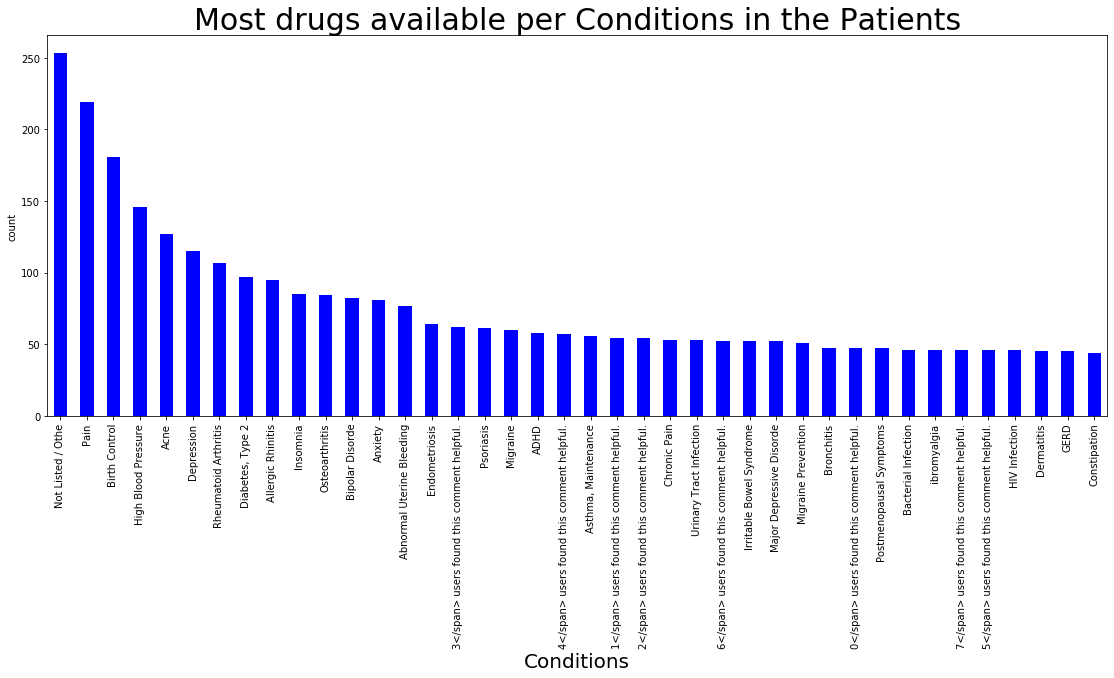

In [21]:
# checking the most popular drugs per conditions

df.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'blue')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

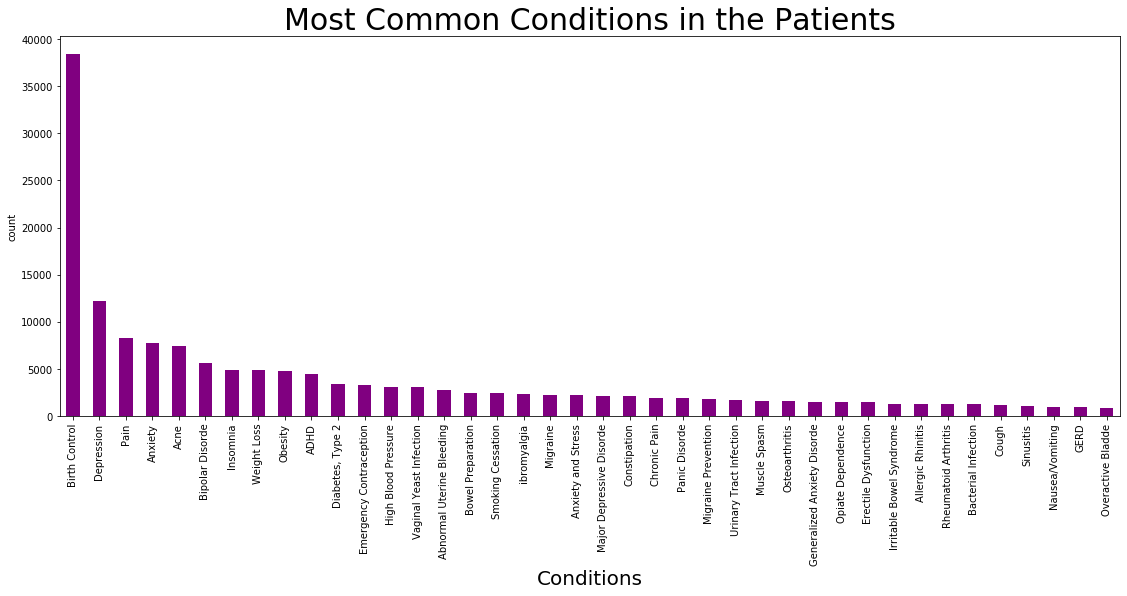

In [22]:
# checking the different types of conditions patients


df['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

In [23]:
# let's read some reviews

train['review'][5]

'"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"'

In [24]:
df['rating'].value_counts()

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

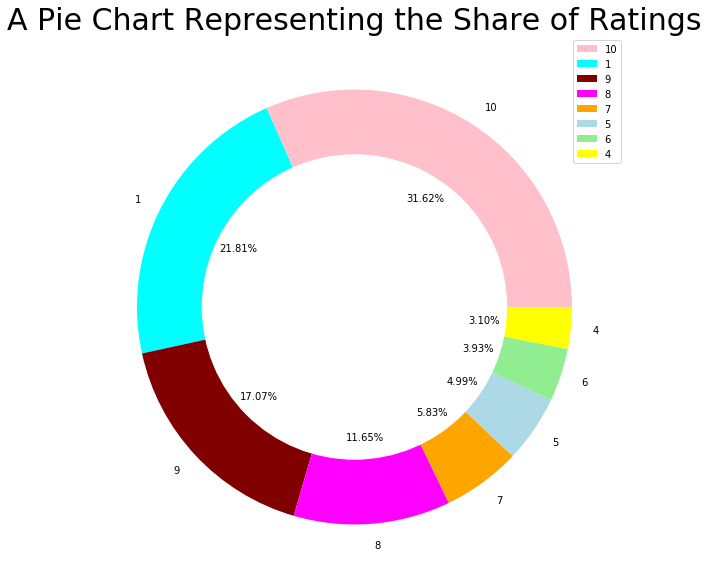

In [25]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [26]:
df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

In [27]:
df.head()


,drugName,condition,review,rating,date,usefulCount,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1.0


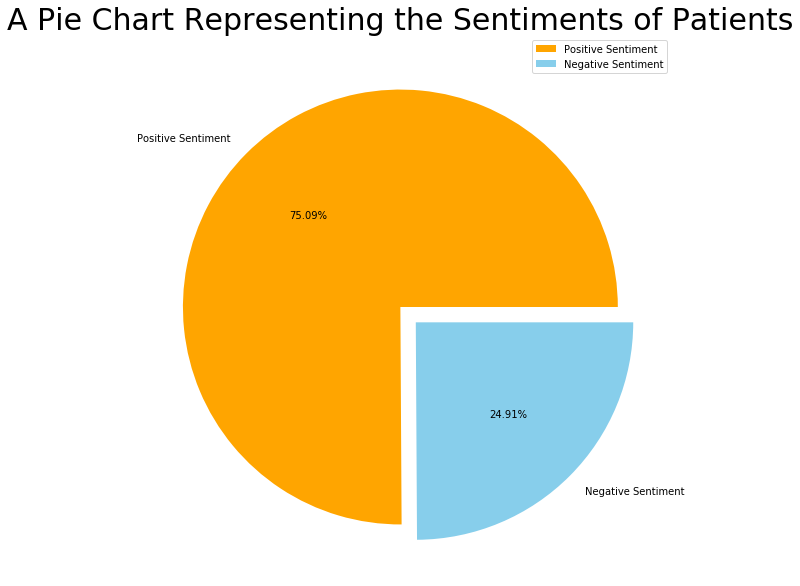

In [28]:
# a pie chart to represent the sentiments of the patients
    
size = [161491, 53572]
colors = ['orange', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [29]:
df.head()

,drugName,condition,review,rating,date,usefulCount,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1.0


In [30]:
positive_sentiments = " ".join([text for text in df['review'][df['Review_Sentiment'] == 1]])
negative_sentiments = " ".join([text for text in df['review'][df['Review_Sentiment'] == 0]])

In [31]:
df.head()

,drugName,condition,review,rating,date,usefulCount,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1.0


In [32]:
df=df.drop(['date'],axis=1)

In [33]:
df.head()

,drugName,condition,review,rating,usefulCount,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,1.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,1.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,1.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,1.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,1.0


In [34]:
df['condition'].isnull().sum()

1194

In [35]:
df = df.dropna(axis = 0)
df.shape

(213869, 6)

In [36]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

In [37]:
stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [38]:
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [39]:
df_condition = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition

,condition,drugName
0,Not Listed / Othe,253
1,Pain,219
2,Birth Control,181
3,High Blood Pressure,146
4,Acne,127
...,...,...
911,Steroid Responsive Inflammatory Conditions,1
912,Ectopic Pregnancy,1
913,Diagnostic Bronchograms,1
914,Systemic Candidiasis,1


In [40]:
# setting a df with conditions with only one drug
df_condition_1 = df_condition[df_condition['drugName'] == 1].reset_index()

all_list = set(df.index)

# deleting them
condition_list = []
for i,j in enumerate(df['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [41]:
all_list = set(df.index)
span_list = []
for i,j in enumerate(df['condition']):
    if '</span>' in j:
        span_list.append(i)
new_idx = all_list.difference(set(span_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [42]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [43]:
df['review_clean'] = df['review'].apply(review_to_words)
df.head()

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,1.0,no side effect take combin bystol mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,1.0,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,1.0,use take anoth oral contracept pill cycl happi...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,1.0,first time use form birth control glad went pa...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,1.0,suboxon complet turn life around feel healthie...


In [44]:
df= df.drop(['review'],axis=1)

In [45]:
df.head()


,drugName,condition,rating,usefulCount,Review_Sentiment,review_clean
0,Valsartan,Left Ventricular Dysfunction,9,27,1.0,no side effect take combin bystol mg fish oil
1,Guanfacine,ADHD,8,192,1.0,son halfway fourth week intuniv becam concern ...
2,Lybrel,Birth Control,5,17,1.0,use take anoth oral contracept pill cycl happi...
3,Ortho Evra,Birth Control,8,10,1.0,first time use form birth control glad went pa...
4,Buprenorphine / naloxone,Opiate Dependence,9,37,1.0,suboxon complet turn life around feel healthie...


In [46]:
x=df.iloc[:,df.columns!='Review_Sentiment']
y=df.iloc[:,df.columns=='Review_Sentiment'].values.ravel()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
cv = CountVectorizer(max_features = 20000, ngram_range = (5, 5))
pipeline = Pipeline([('vect',cv)])

In [49]:
df_train_features = pipeline.fit_transform(x['review_clean'],x['drugName'])
#df_test_features = pipeline.fit_transform(df_test['review_clean'])

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_features,y, test_size = 0.3, random_state=0)

In [52]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediclg=lreg.predict(X_test)

In [54]:
from sklearn import metrics

In [55]:
model1=metrics.accuracy_score(y_test,prediclg)

In [56]:
print(model1)

0.7567991631799164


In [57]:
cnf1=confusion_matrix(y_test,prediclg)

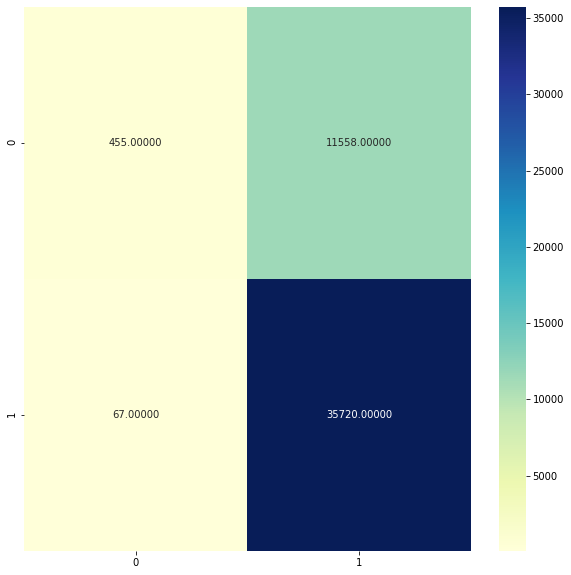

In [58]:
labels = [0,1]
sns.heatmap(cnf1, annot=True, cmap="YlGnBu", fmt=".05f", xticklabels=labels, yticklabels=labels)
plt.show()

In [59]:
cr1=classification_report(y_test,prediclg)
print(cr1)

              precision    recall  f1-score   support

         0.0       0.87      0.04      0.07     12013
         1.0       0.76      1.00      0.86     35787

    accuracy                           0.76     47800
   macro avg       0.81      0.52      0.47     47800
weighted avg       0.78      0.76      0.66     47800



In [60]:
from sklearn.svm import SVC

In [61]:
sv=SVC()

In [62]:
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
predicsvm=sv.predict(X_test)

In [64]:
model2=metrics.accuracy_score(y_test,predicsvm)

In [65]:
print(model2)

0.7723430962343096


In [66]:
cnf2=confusion_matrix(y_test,predicsvm)

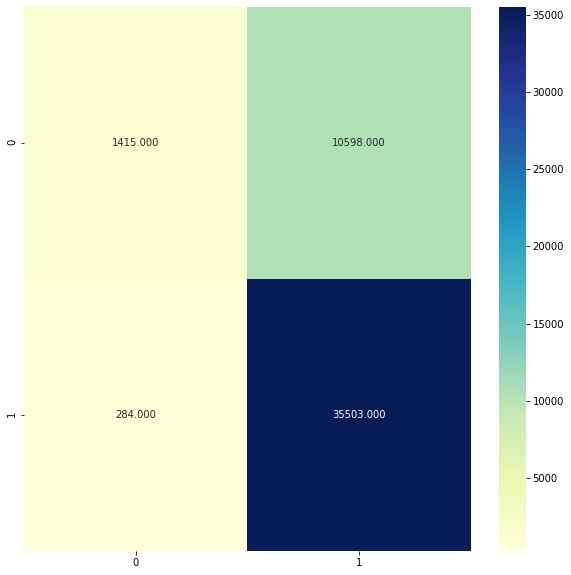

In [67]:
labels = [0,1]
sns.heatmap(cnf2, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [68]:
cr2=classification_report(y_test,prediclg)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.87      0.04      0.07     12013
         1.0       0.76      1.00      0.86     35787

    accuracy                           0.76     47800
   macro avg       0.81      0.52      0.47     47800
weighted avg       0.78      0.76      0.66     47800



In [69]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_features,y, test_size = 0.3, random_state=0)

In [71]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [72]:
predknn = neigh.predict(X_test)

In [73]:
model3=metrics.accuracy_score(y_test,predknn)
print(model3)

0.755020920502092


In [74]:
cnf3=confusion_matrix(y_test,predknn)

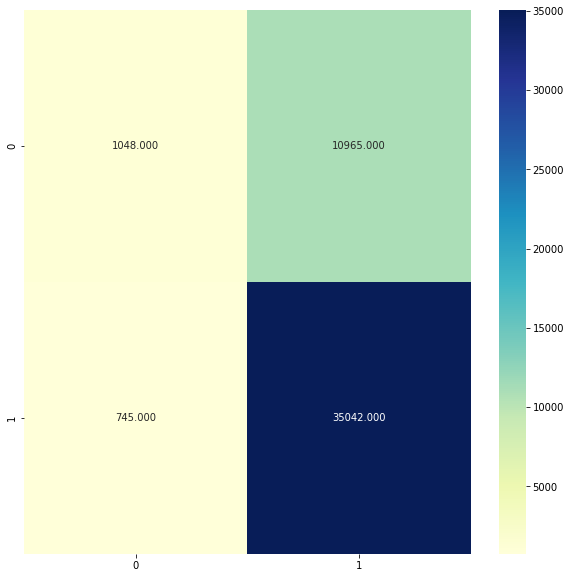

In [75]:
labels = [0,1]
sns.heatmap(cnf3, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [76]:
cr3=classification_report(y_test,predknn)
print(cr3)

              precision    recall  f1-score   support

         0.0       0.58      0.09      0.15     12013
         1.0       0.76      0.98      0.86     35787

    accuracy                           0.76     47800
   macro avg       0.67      0.53      0.50     47800
weighted avg       0.72      0.76      0.68     47800



ValueError: shape mismatch: objects cannot be broadcast to a single shape

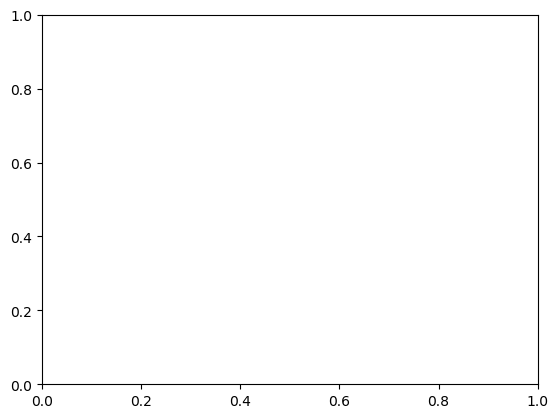

In [77]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = (' LogisticRegression','SVM','KNeighbors','RandomForest')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LogisticRegression vs SVM vs NeighborsClassifier vs RandomForestClassifier')

plt.show()